In [2]:
#Initial Imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline


In [30]:
#Read the ADP.csv data files
adp_csv = Path("Resources/adp.csv")
adp =pd.read_csv(adp_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
adp = adp.rename(columns={"Close":"adp"})
adp = adp[["adp"]]

adp

,adp
Date,
2016-10-13,86.889999
2016-10-14,87.559998
2016-10-17,87.239998
2016-10-18,87.379997
2016-10-19,87.430000
...,...
2021-10-06,204.990005
2021-10-07,207.570007
2021-10-08,206.160004


In [4]:
#Count Nulls
print(adp.isnull().sum())
print(adp[adp.isnull().any(axis = 1)])


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


In [5]:
#Drop nulls
adp.dropna(inplace=True)


In [31]:
#Read the BR.csv data files
br_csv = Path("Resources/br.csv")
br =pd.read_csv(br_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
br = br.rename(columns={"Close":"br"})
br = br[["br"]]
br

,br
Date,
2016-10-13,65.260002
2016-10-14,65.739998
2016-10-17,65.519997
2016-10-18,65.500000
2016-10-19,64.989998
...,...
2021-10-06,166.979996
2021-10-07,168.899994
2021-10-08,168.940002


In [11]:
#Count Nulls
print(br.isnull().sum())
print(br[br.isnull().any(axis = 1)])


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


In [12]:
#Drop nulls
br.dropna(inplace=True)


In [32]:
#Read the cdk.csv data files
cdk_csv = Path("Resources/cdk.csv")
cdk =pd.read_csv(cdk_csv, index_col="Date", parse_dates=True, infer_datetime_format=True)
cdk = cdk.rename(columns={"Close":"cdk"})
cdk = cdk[["cdk"]]
cdk

,cdk
Date,
2016-10-13,54.810001
2016-10-14,54.540001
2016-10-17,54.630001
2016-10-18,54.980000
2016-10-19,55.259998
...,...
2021-10-06,43.310001
2021-10-07,43.709999
2021-10-08,43.660000


In [ ]:
#Count Nulls
print(cdk.isnull().sum())
print(cdk[cdk.isnull().any(axis = 1)])

In [ ]:
#Drop nulls
cdk.dropna(inplace=True)

In [41]:
# Join ADP, BR, CDK into a single Data Frame
df_daily = pd.concat([adp,br, cdk], axis = "columns", join = "inner")
df_daily_returns = df_daily.pct_change()
df_daily_returns = df_daily_returns.dropna().copy()
df_daily_returns

,adp,br,cdk
Date,,,
2016-10-14,0.007711,0.007355,-0.004926
2016-10-17,-0.003655,-0.003347,0.001650
2016-10-18,0.001605,-0.000305,0.006407
2016-10-19,0.000572,-0.007786,0.005093
2016-10-20,-0.006748,-0.012617,-0.009229
...,...,...,...
2021-10-06,0.006037,0.015446,0.004639
2021-10-07,0.012586,0.011498,0.009236
2021-10-08,-0.006793,0.000237,-0.001144


<AxesSubplot:xlabel='Date'>

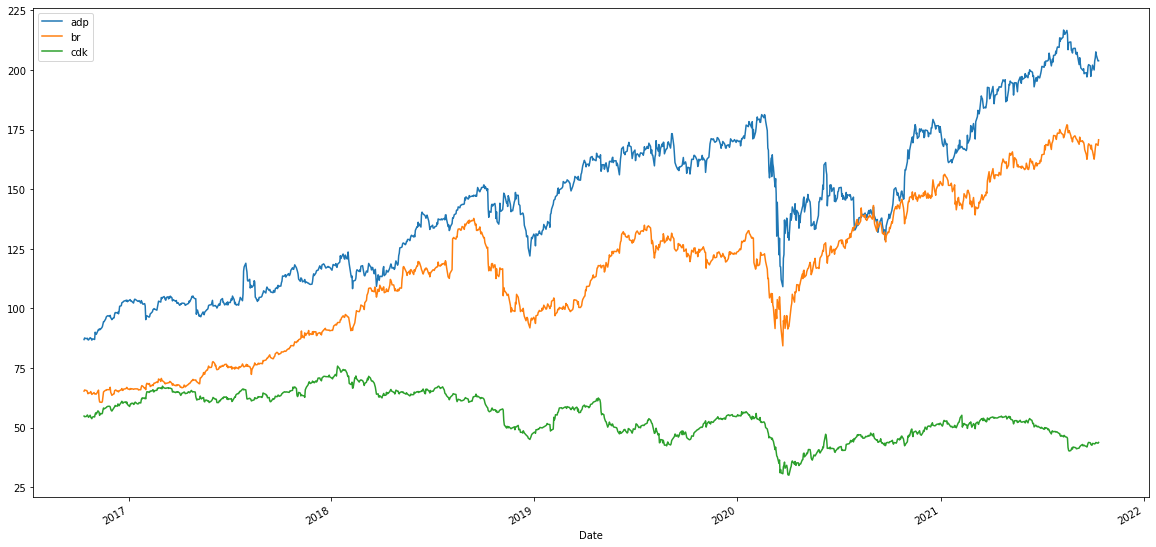

In [42]:
# PLot daily returns of all portfolios
df_daily.plot(figsize = (20,10))


In [43]:
df_cum = (1+ df_daily_returns).cumprod()

df_cum.replace([np.inf,-np.inf],np.nan,inplace=True)
df_cum = df_cum.dropna().copy()
df_cum


,adp,br,cdk
Date,,,
2016-10-14,1.007711,1.007355,0.995074
2016-10-17,1.004028,1.003984,0.996716
2016-10-18,1.005639,1.003678,1.003102
2016-10-19,1.006215,0.995863,1.008210
2016-10-20,0.999425,0.983298,0.998905
...,...,...,...
2021-10-06,2.359190,2.558688,0.790184
2021-10-07,2.388883,2.588109,0.797482
2021-10-08,2.372655,2.588722,0.796570


<AxesSubplot:xlabel='Date'>

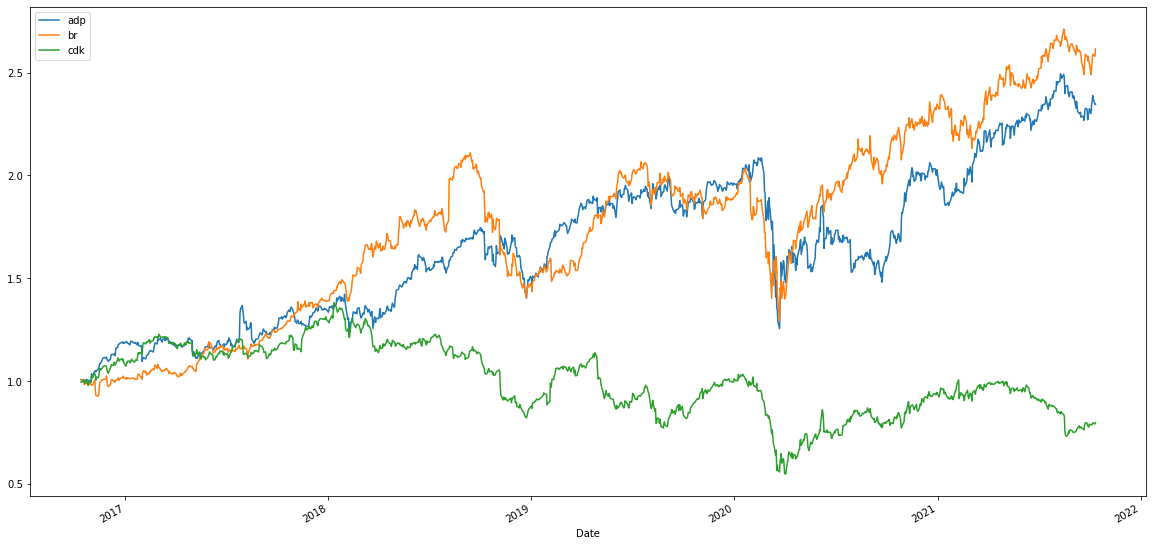

In [44]:
# Plot cumulative returns
df_cum.plot(figsize = (20,10))

 <AxesSubplot:xlabel='Date'>


<AxesSubplot:>

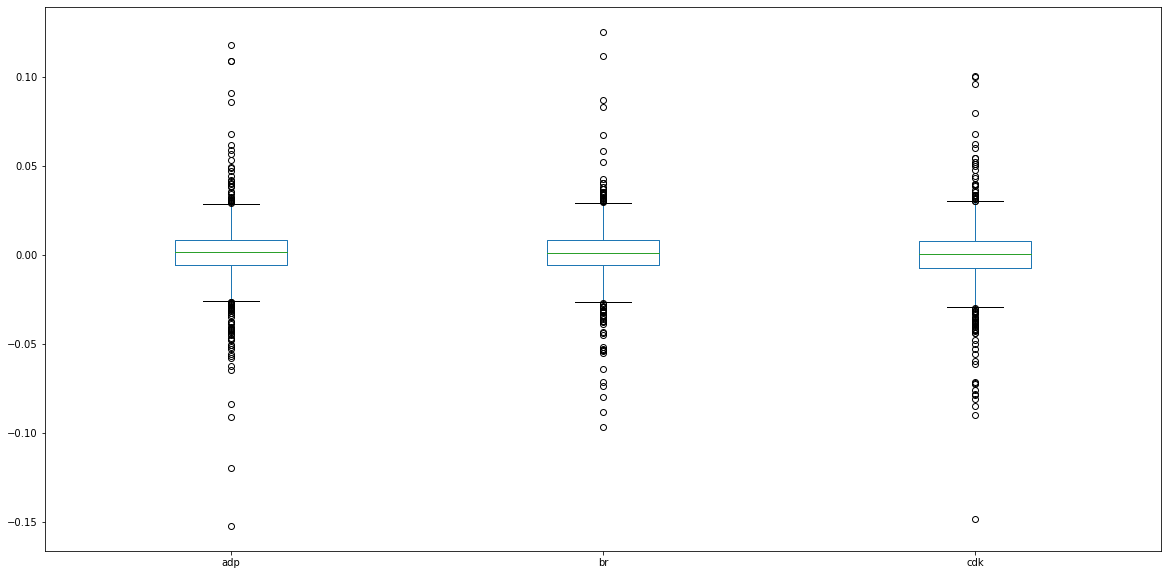

In [45]:
# Box plot to visually show risk
df_daily_returns.plot(kind = "box", figsize = (20,10))

In [ ]:
<AxesSubplot:>

In [47]:
# Calculate the standard deviation of all stocks
#df_daily_std = pd.DataFrame(df_daily.std()).rename(columns - [0:"std"})
df_daily_returns.std()

adp    0.016821
br     0.015299
cdk    0.017241
dtype: float64

In [48]:
# Calculate the Annualized Std Deviation (252 trading days)
df_annualized_std = df_daily_returns.std()*np.sqrt(252)
df_annualized_std


adp    0.267029
br     0.242863
cdk    0.273696
dtype: float64